# Getting oriented

This notebook contains some simple notes and small tests, carried out, in order to get oriented with the data and method involved in this project

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Data set is containted in the same path, in the archive folder
dataset = pd.read_csv("archive/creditcard.csv")

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:

import matplotlib.pyplot as plt

0    284315
1       492
Name: Class, dtype: int64
as a percentage of the whole dataset
0    99.827251
1     0.172749
Name: Class, dtype: float64


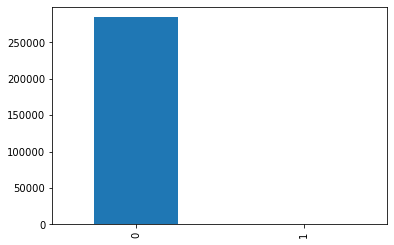

In [5]:
# Having a look at how many samples are fraudulent and how many are nnot

#flag = dataset.class.unique()
fig, ax = plt.subplots()
print(dataset.Class.value_counts())
print("as a percentage of the whole dataset")
print((dataset.Class.value_counts()*100)/ len(dataset))
dataset.Class.value_counts().plot(ax=ax, kind='bar')

##### Looking at how skewed the dataset is, is worth noting. This will give us even more motivation for cross validation, when we come to write about it

## Now I want to have a look at some of the distributions of the features

In [6]:
def meanANDstd(feature):
    
    mean = np.mean(feature)
    std = np.std(feature)
    #print(mean, std)
    return mean, std


In [7]:
testmean , testSTd = meanANDstd(dataset.V1)

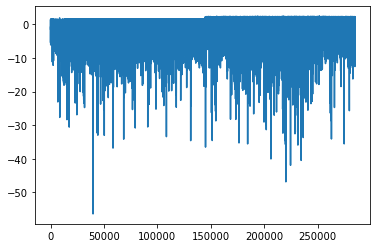

In [8]:
dataset.V1.plot()

### Trying out some simple scaling

z = (x - u) / s

where x is the instace value, u is the mean, and s is the std

In [9]:
def normiMachine( sample, mean, std):
    return (sample - mean) / std

In [10]:
#creating a copy of the dataframe where I will store normised versions
dataNorm = dataset.copy()

In [11]:
#meanV1 , stdV1 = meanANDstd(dataset.V1)

#dataNorm.V1 =dataset.V1.apply(normiMachine, args=(meanV1, stdV1))

In [12]:
dataset.columns.tolist()[0]

'Time'

In [13]:
for col in dataNorm.columns.tolist():
    mean, std = meanANDstd(dataNorm[col])

    dataNorm[col] =dataNorm[col].apply(normiMachine, args=(mean, std))

In [14]:
dataNorm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599


In [15]:
# just wanted to make sure that the mean came close to 0,  and std close to 1s

In [16]:
print("mean,std")

for col in dataNorm.columns.tolist():
    mean, std = meanANDstd(dataNorm[col])
    print(mean,std)



mean,std
-1.1504300418553255e-14 1.0000000000000133
-2.263246277900502e-15 0.999999999999998
-1.860365775757046e-16 1.0000000000000353
1.9013407888201706e-16 0.9999999999999983
-1.2499566338828806e-15 0.9999999999999912
1.4710335634249372e-15 0.99999999999999
-8.201259158125939e-17 1.000000000000006
-4.475632493208128e-17 1.0000000000000024
4.712231265287549e-17 1.000000000000004
1.0645668096439025e-15 1.000000000000007
4.463552097876155e-16 0.9999999999999978
2.4660035707817974e-15 1.0000000000000102
2.5318467442210106e-15 0.9999999999999997
-9.311568916793088e-16 1.0000000000000062
-9.948287417223134e-16 0.9999999999999973
-5.971743554248568e-17 1.0000000000000115
-9.753681565025508e-17 0.9999999999999992
1.2223621496958072e-15 1.000000000000007
3.1498607561333194e-16 1.0000000000000033
-1.7545166229025263e-16 1.000000000000006
4.2348607417150635e-16 1.0000000000000155
7.262309553862485e-17 1.0000000000000133
-3.4255112869851545e-16 1.000000000000008
-1.1791339031664796e-15 1.0000000

In [21]:
def get_creditcards_transposed():
    # Data set is containted in the same path, in the archive folder
    df = pd.read_csv("archive/creditcard.csv")
    print("Credit Card samples:")
    print(df.head())
    return df.T

In [22]:
def loaddata():
    df = get_creditcards_transposed()
    # df = get_4_dims_6_samples()
    # df = get_2_dims_10_samples()

    print("Dataframe Data:")
    print(df)
    print()

    return df.to_numpy()

In [23]:
def normalize(m):
    avg = np.mean(m, axis=1)
    norm = np.zeros(shape=(len(m), len(m[0])))
    for i in range(len(m)):
        norm[i] = (m[i] - avg[i])
    print("Normalized Data:")
    print(norm)
    return avg, norm

In [24]:
def cov(m):
    V = np.cov(m)
    print("Covariance matrix:")
    print(V)
    return V

In [25]:
def eigen(m):
    # eigendecomposition of covariance matrix
    values, vectors = np.linalg.eigh(m)
    print("Eigen vectors:")
    print(vectors.T)
    print("Eigen values:")
    print(values.T)
    # the numpy lib returns the eigen vectors like this: [[e1,e3],[e2,e4]]
    # so i transpose to get [[e1,e2],[e3,e4]]
    return values, vectors.T

In [26]:
def best_n_eigens(evals, evecs, n):
    bevals = hq.nlargest(n, evals)
    eigenpairs = dict(zip(evals, evecs))
    bevecs = []
    for beval in bevals:
        bevecs.append(eigenpairs[beval])
    print("Best ", n ," eigen vectors:")
    print(np.array(bevecs))
    print("Best ", n ," eigen values:")
    print(bevals)
    return bevals, np.array(bevecs)

In [27]:
def project_to_eigen_basis(ev, m):
    projected = np.dot(m.T, ev.T)
    print("Projection to eigen basis:")
    print(projected.T)
    return projected.T

In [28]:
def project_to_norm_basis(ev, m):
    projected = np.dot(ev.T, m)
    print("Projection to norm basis:")
    print(projected)
    return projected

In [29]:
def denormalize(m, avg):
    proj = np.zeros(shape=(len(m), len(m[0])))
    for i in range(len(m)):
        proj[i] = (m[i] + avg[i])
    print(proj)
    return proj

In [30]:
def pca(norm_training_set, norm_test_set, n):
    cm = cov(norm_training_set)
    eigenvals, eigenvecs = eigen(cm)
    beigenvals, beigenvecs = best_n_eigens(eigenvals, eigenvecs, n)
    projected_training_set = project_to_eigen_basis(beigenvecs, norm_training_set)
    projected_test_set = project_to_eigen_basis(beigenvecs, norm_test_set)
    return projected_training_set, projected_test_set

In [31]:
def calc_display_axes(m):
    min = int(np.min(np.min(m, axis=1)) - 1)
    max = int(np.max(np.max(m, axis=1)) + 1)
    return min,max

In [32]:
def showpca():
    d = loaddata()

    # here we should split training and test set, but i will use the same data twice for now
    avg, norm = normalize(d)

    # now you can do classification based on the feature extraction having reduced the dimensions (eg. 2)
    projected_training_set, projected_test_set = pca(norm, norm, 2)

    plt.figure(figsize=(6,6))
    min, max = calc_display_axes(norm)
    plt.xlim(min, max)
    plt.ylim(min, max)
    plt.grid()

    #plt.scatter(norm[0], norm[1], c='blue')
    #plt.scatter(projected, np.zeros(len(projected)), c='black')
    plt.scatter(projected_training_set[0], projected_training_set[1], c='black')

    #projected2 = project_to_norm_basis(beigenvecs, projected)
    #plt.scatter(projected2[0], projected2[1], c='red')

    # projected3 = denormalize(projected2, avg)
    # plt.scatter(projected3[0], projected3[1], c='green')

    plt.show()

In [33]:
 showpca()

Credit Card samples:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26

Normalized Data:
[[-9.48138596e+04 -9.48138596e+04 -9.48128596e+04 ...  7.79741404e+04
   7.79741404e+04  7.79781404e+04]
 [-1.35980713e+00  1.19185711e+00 -1.35835406e+00 ...  1.91956501e+00
  -2.40440050e-01 -5.33412522e-01]
 [-7.27811733e-02  2.66150712e-01 -1.34016307e+00 ... -3.01253846e-01
   5.30482513e-01 -1.89733337e-01]
 ...
 [-2.10530535e-02  1.47241692e-02 -5.97518406e-02 ... -2.65608286e-02
   1.04532821e-01  1.36489143e-02]
 [ 6.12703807e+01 -8.56596193e+01  2.90310381e+02 ... -2.04696193e+01
  -7.83496193e+01  1.28650381e+02]
 [-1.72748563e-03 -1.72748563e-03 -1.72748563e-03 ... -1.72748563e-03
  -1.72748563e-03 -1.72748563e-03]]
Covariance matrix:
[[ 2.25512401e+09  1.09195977e+04 -8.30703107e+02 -3.02142452e+04
  -7.07737765e+03  1.13440743e+04 -3.98686832e+03  4.97673921e+03
  -2.09568344e+03 -4.51832156e+02  1.58310799e+03 -1.20059453e+04
   5.90034338e+03 -3.11477532e+03 -4.49560084e+03 -7.97410113e+03
   4.95297668e+02 -2.95632893e+03  3.59974826e+03  1.12010621e+0

Eigen vectors:
[[ 4.36905032e-09  1.92699620e-03 -2.87200465e-03  5.09196687e-03
  -3.77315540e-03  2.32861222e-03  1.66139610e-03  6.84914972e-03
  -8.39755767e-04  3.62433315e-03  8.10030493e-03 -6.25260669e-03
   1.07913925e-02  2.14050087e-04  1.31969593e-02  2.27477154e-04
   9.30928836e-03  1.60072853e-02  5.58153339e-03 -1.90720623e-03
  -2.77981844e-04 -2.04044913e-03 -2.47953200e-04 -1.62680224e-04
   5.16849981e-04 -3.36394941e-04 -3.78976825e-04 -1.68552012e-03
  -1.14612770e-03 -7.17807289e-06  9.99548310e-01]
 [-3.89831339e-08  8.04881491e-02  2.25079318e-01  9.74790518e-02
  -4.96399278e-02  1.99511284e-01 -1.15999486e-01 -2.31840679e-01
   6.26159493e-02  2.96641770e-02  6.88767032e-02 -5.74766218e-04
   7.43733676e-03 -4.14127128e-03 -2.69753739e-02  2.08582879e-03
   3.50657312e-03 -6.97337347e-03 -3.34411544e-02  5.52813060e-02
  -3.60368620e-01 -1.20596914e-01  7.56181175e-02  1.66735052e-01
  -8.10400138e-03  9.98015152e-02  7.92740215e-03 -1.37518424e-01
  -7.76121

NameError: name 'hq' is not defined

In [34]:
import heapq as hq

Credit Card samples:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26

Covariance matrix:
[[ 2.25512401e+09  1.09195977e+04 -8.30703107e+02 -3.02142452e+04
  -7.07737765e+03  1.13440743e+04 -3.98686832e+03  4.97673921e+03
  -2.09568344e+03 -4.51832156e+02  1.58310799e+03 -1.20059453e+04
   5.90034338e+03 -3.11477532e+03 -4.49560084e+03 -7.97410113e+03
   4.95297668e+02 -2.95632893e+03  3.59974826e+03  1.12010621e+03
  -1.86219477e+03  1.56043508e+03  4.96459508e+03  1.51659930e+03
  -4.65407631e+02 -5.76985472e+03 -9.48225369e+02 -9.84186044e+01
  -1.47544285e+02 -1.25860971e+05 -2.43007167e+01]
 [ 1.09195977e+04  3.83648925e+00 -2.65849153e-16 -1.22625916e-15
  -6.64223710e-16  8.55826703e-16  5.49261914e-16  4.98167783e-16
  -1.14961796e-16  1.53282395e-16  1.18155179e-16  5.89179204e-16
   4.66233950e-16 -8.30279638e-17  7.53638440e-16 -2.01183143e-16
   5.17328082e-16  4.31106735e-17  2.29125246e-16  2.81816069e-16
   2.36310358e-16 -1.40508862e-16  5.42875148e-17  2.17150059e-16
  -7.02544309e-17 -3.06564789e-16 -1.30529539e-16  8.03834433e-17
   3.4

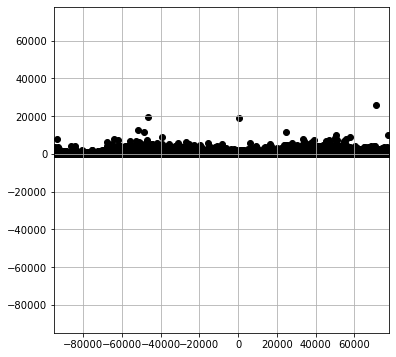

In [35]:
showpca()